# Data Science I - Projeto final

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from IPython.display import display, Markdown

%matplotlib inline

In [111]:
df = pd.read_csv('titanic-data-6.csv')

# Preparar dados (Wrangle data)

## Avaliação dos dados

Consultar o formato do dataframe, número de linhas e colunas.

In [84]:
df.shape

(891, 12)

Consultar as primeiro cinco linhas do dataframe.

In [85]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Consultar informações como número de entradas, colunas e seus tipos de dados.

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Verificar a existência de linhas duplicados.

In [87]:
df.duplicated().sum()

0

Verificar variedade de registros únicos em gênero (Sex)

In [88]:
df['Sex'].nunique()

2

In [89]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

Verificar variedade de registros únicos em sobreviventes (Survived)

In [90]:
df['Survived'].nunique()

2

In [91]:
df['Survived'].unique()

array([0, 1], dtype=int64)

Substituição dos valores de sobreviventes de 0, 1 para 'No' e 'Yes', respectivamente

In [92]:
survived = {'0':'No', '1':'Yes'}
df['Survived'] = df['Survived'].astype(str).replace(survived.keys(),survived.values())

Verificar se existe valores nulos

In [93]:
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

Foram encontrados valores nulos nas colunas 'Age', 'Cabin' e 'Embarked'

Preenchimento de valores nulos em idade com seu valor médio

In [94]:
df['Age'].fillna(round(df['Age'].mean()), inplace=True)

Verificar os registros nulos em local de embarque (Embarked)

In [95]:
df['Embarked'].isnull().any().sum()

1

Verificar se existe passageiros sem local de embarque marcados como não sobreviventes

In [96]:
df[df['Survived'] == 0]['Embarked'].isnull().any().sum()

0

Por não existir passageiros sem local de embarque marcado como não sobrevivente todos serão removidos, considerando que estes não estavam a bordo

In [97]:
df['Embarked'].dropna(how='any', inplace=True)

Substituição do nome dos locais de embarque abreviados pelo nome completo

In [98]:
embarked_places = {'S': 'Southampton', 'C': 'Cherbourg', 'Q': 'Queenstown'}
df['Embarked'].replace(embarked_places.keys(), embarked_places.values(), inplace=True)

Declaração da função para categorizar idade

In [18]:
def age_category(age):
    """
        Categorizar idade em 'Children', 'Youth', 'Adult', 'Senior'
        
        args:
            age (int): Idade a ser categorizada
            
        return (String): Nome da categoria
    """

    # Used as reference:
    # https://www.statcan.gc.ca/eng/concepts/definitions/age2
    if(age < 15):
        return 'Children'
    elif(age < 25):
        return 'Youth'
    elif(age < 65):
        return 'Adult'
    else:
        return 'Senior'

Categorização das idades no dataframe

In [122]:
ages = [0, 15, 25, 65, np.inf]
ages_categories = ['Child', 'Youth', 'Adult', 'Senior']

pd.cut(df['Age'], ages, ages_categories,  right=True)

0      Youth
1      Adult
2      Adult
3      Adult
4      Adult
5        NaN
6      Adult
7      Child
8      Adult
9      Child
10     Child
11     Adult
12     Youth
13     Adult
14     Child
15     Adult
16     Child
17       NaN
18     Adult
19       NaN
20     Adult
21     Adult
22     Child
23     Adult
24     Child
25     Adult
26       NaN
27     Youth
28       NaN
29       NaN
       ...  
861    Youth
862    Adult
863      NaN
864    Youth
865    Adult
866    Adult
867    Adult
868      NaN
869    Child
870    Adult
871    Adult
872    Adult
873    Adult
874    Adult
875    Child
876    Youth
877    Youth
878      NaN
879    Adult
880    Youth
881    Adult
882    Youth
883    Adult
884    Youth
885    Adult
886    Adult
887    Youth
888      NaN
889    Adult
890    Adult
Name: Age, Length: 891, dtype: category
Categories (4, object): [Child < Youth < Adult < Senior]

In [123]:
# Exibição do cabeçalho para verificar resultado das mudanças
df['AgeCategory'].unique()

KeyError: 'AgeCategory'

Declaração de função para imprimir em Markdown

In [114]:
def print_md(message):
    display(Markdown(message))

# Explorar (Explore)

Criar um array de conclusões que será preenchido ao longo da exploração dos dados

In [22]:
conclusions = []

Matriz de gráficos de dispersão para ideias

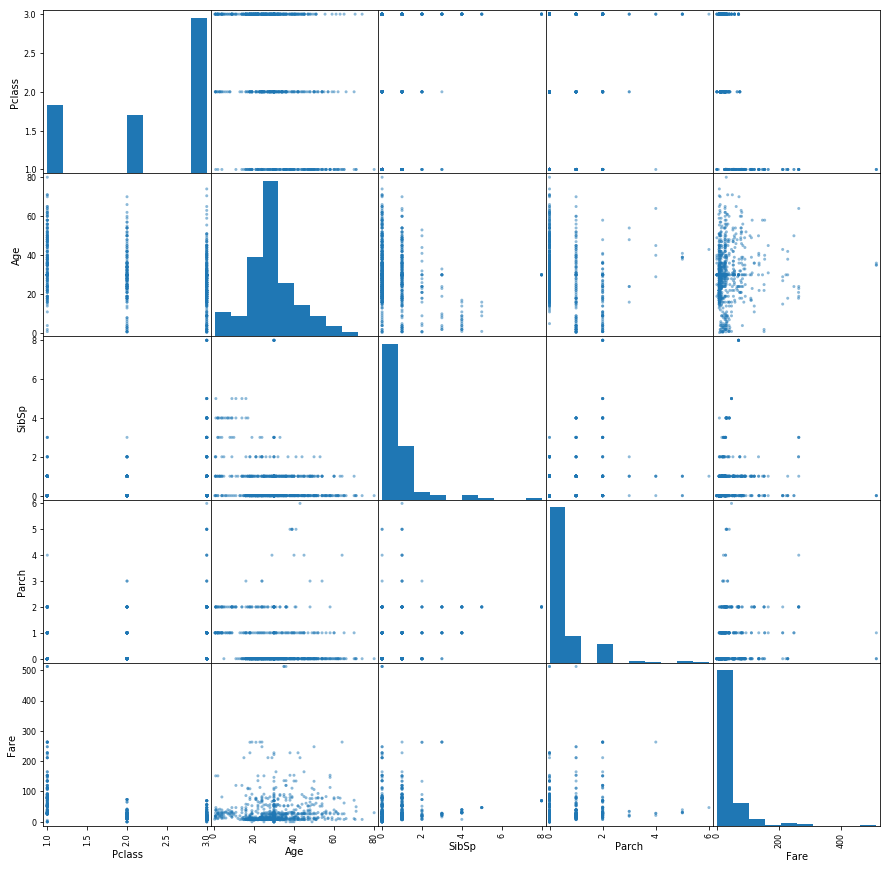

In [23]:
pd.plotting.scatter_matrix(df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']], figsize=(15,15));

Histograma do conjunto de dados

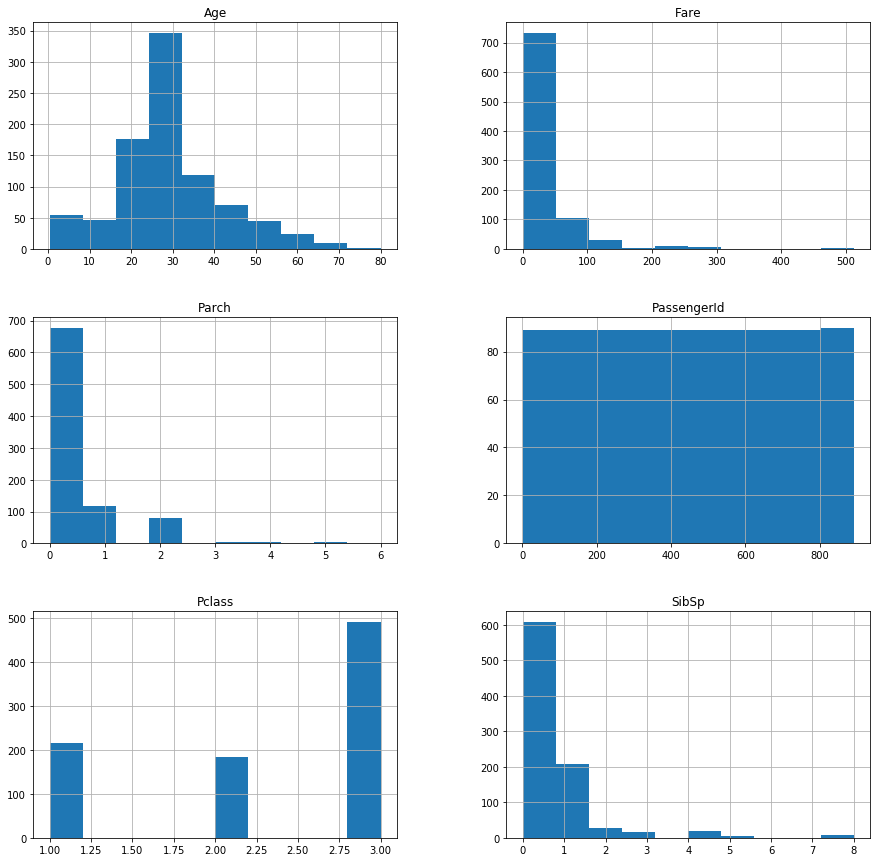

In [24]:
df.hist(figsize=(15,15));

Definir estilo padrão para os gráficos com Seaborn

In [25]:
sns.set_style('whitegrid')

Definição de função para gerar subplot padrão

In [80]:
def create_fig(title):
    fig = plt.figure(title)
    fig.suptitle(title, fontsize='x-large', horizontalalignment='center', verticalalignment='bottom')
    plt.subplots_adjust(top=.9)
    plt.tight_layout()
    fig.set_figwidth(10)
    
    return fig


### Sobreviventes

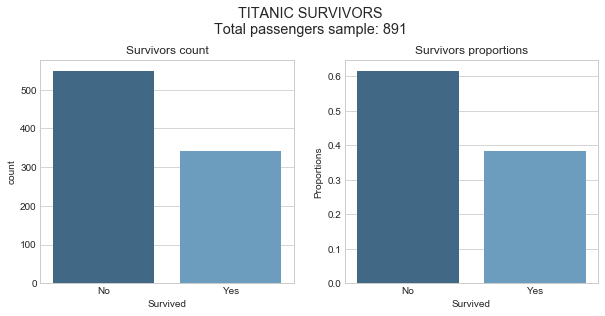

In [82]:
def question_1():
    """
        Gerar os gráficos de frequência e proporção dos sobreviventes
    """
    title = 'TITANIC SURVIVORS\nTotal passengers sample: {count}'.format(count=df.shape[0])
    
    fig = create_fig(title)
    ax1 = fig.add_subplot(1,2,1)
    ax2 = fig.add_subplot(1,2,2)

    # Definição do dataframe de proporções
    df_proportions = df['Survived'].value_counts(normalize=True).reset_index().rename(columns={'index':'Survived','Survived':'Proportions'})
    df_proportions['Proportions'] = df_proportions['Proportions']

    # Definição dos títulos
    ax1.set_title('Survivors count')
    ax2.set_title('Survivors proportions')

    # Gerar os gráficos com seaborn
    sns.countplot(data=df, x='Survived', ax=ax1, palette='Blues_d')
    sns.barplot(data=df_proportions, x='Survived', y='Proportions', ax=ax2, palette='Blues_d');

question_1()

In [65]:
title = 
df_proportions = None

def question_1():
    """
        Gerar o gráfico de frequência e proporção dos sobreviventes
    """
    fig, ax = plt.subplots(1, 2)
    fig.suptitle(title, fontsize='x-large', horizontalalignment='center', verticalalignment='bottom')

    # Redimensionar o layout automaticamente
    plt.tight_layout()
    # Ajuste de posicionamento em relação ao topo
    plt.subplots_adjust(top=.9)
    # Definição da largura dos gráficos
    fig.set_figwidth(14)

    # Definição do dataframe de proporções
    df_proportions = df['Survived'].value_counts(normalize=True).reset_index().rename(columns={'index':'Survived','Survived':'Proportions'})
    df_proportions['Proportions'] = df_proportions['Proportions']

    # Definição dos títulos
    ax[0].set_title('Survivors count')
    ax[1].set_title('Survivors proportions')

    # Gerar os gráficos com seaborn
    sns.countplot(data=df, x='Survived', ax=ax[0], palette='Blues_d')
    sns.barplot(data=df_proportions, x='Survived', y='Proportions', ax=ax[1], palette='Blues_d');

# question_1()

In [ ]:
df_proportions

In [ ]:
# CONCLUSÃO
conclusions.append((
    'Quais são os números de sobreviventes?',
    'Com base na amostra analisada, sobreviveram apenas 38,4% (342) do total de 891 pessoas a bordo, 61,6% (549) morreram.',[]
))

### Sobreviventes por gênero e classe

In [ ]:
# Contagem e proporção de sobreviventes por gênero e classe
df_surv_by_sex = df.groupby(['Pclass', 'Sex', 'Survived']).count()['PassengerId'].reset_index()
df_surv_by_sex.rename(columns={'PassengerId':'Count'}, inplace=True)

def calculate_surv_proportion(row):
    total = df.query('Sex == "{sex}" and Pclass == "{pclass}"'.format(sex = row['Sex'], pclass = row['Pclass']))['Sex'].count()
    return (row['Count'] / total)

df_surv_by_sex['Proportion'] = df_surv_by_sex.apply(lambda row: calculate_surv_proportion(row), axis=1)

df_surv_by_sex.sort_values(['Sex'], ascending=False)

In [ ]:
def segunda_analise():
    ax_by_class = sns.factorplot(data=df_surv_by_sex.sort_values(['Sex'], ascending=False), x='Survived', y='Proportion', hue='Sex', col='Pclass', kind='bar', palette='Blues_d')
    ax_by_class.set_titles('Class {col_name}');

segunda_analise()

In [ ]:
# CONCLUSÃO
conclusions.append((
    'Quais são as características do maior grupo de sobreviventes?',
    'De acordo com o gráfico e os dados de sobreviventes por gênero e classe, as mulheres da primeira classe apresentaram maiores chances, com 96,8% de sobreviventes, seguida das mulheres da segunda classe com proporção de 92,1% e da terceira com 50% de sobreviventes.'
))

### Sobrevivents por local de embarque

In [ ]:
ax_by_class = sns.factorplot(data=df, x='Survived', hue='Sex', col='Embarked', kind='count', palette='Blues_d')
ax_by_class.set_titles('{col_name}');

### Local de embarque por classe e gênero

In [ ]:
ax_by_class = sns.factorplot(data=df, x='Pclass', hue='Sex', col='Embarked', kind='count', palette='Blues_d')
ax_by_class.set_titles('{col_name}');

### Contagem de pessoas por gênero e classe

In [ ]:
ax_by_class = sns.factorplot(data=df, x='Sex', col='Pclass', kind='count', palette='Blues_d')
ax_by_class.set_titles('Class {col_name}');

### Classificação de idade por classe, local de embarque e sobreviventes

In [ ]:
ax_by_class = sns.factorplot(data=df, x='AgeCategory', hue='Survived', col='Embarked', kind='count', palette='Blues_d')
ax_by_class.set_titles('{col_name}');

In [ ]:
ax_by_class = sns.factorplot(data=df, x='AgeCategory', hue='Sex', col='Embarked', kind='count', palette='Blues_d')
ax_by_class.set_titles('{col_name}');

In [ ]:
def terceira_analise_1():
    ax_by_class = sns.factorplot(data=df, x='AgeCategory', hue='Survived', col='Pclass', kind='count', palette='Blues_d')
    ax_by_class.set_titles('Class {col_name}');

terceira_analise_1()

In [ ]:
def terceira_analise_2():
    # Avaliação de distribuição e densidade de idade por classe e gênero
    fig, ax = plt.subplots(figsize=(12,12))
    sns.violinplot(data=df, ax=ax, x='Pclass', y='Age', col='Pclass', hue='Sex', split=True, inner='quart', palette='Blues_d')
    
    df_age = df['AgeCategory'].value_counts().reset_index()
    df_age['Proportions'] = df['AgeCategory'].value_counts(normalize=True).reset_index()['AgeCategory']
    return df_age    
    
terceira_analise_2()

In [ ]:
def terceira_analise_3():
    return df.groupby('Sex')['Age'].describe()

terceira_analise_3()

In [ ]:
# CONCLUSÃO
conclusions.append((
    'Qual é a descrição de idade dos passageiros?',
    'Para os homens, a idade máxima era de 80 anos, com média em 30 anos e a mínima em 0.4 anos (4,8 meses). No que diz as mulheres, a idade máxima era de 63 anos, média em 28 anos e a mínima em 0.75 ano (9 meses). Em ambos os gêneros, 75% se encaixam em 35 anos, que é possível ver a predominância de pessoas entre 20 e 40 anos no gráfico em violino'
))

In [ ]:
df_surv_by_agecategory = None

def quarta_analise_1():
    df_surv_by_agecategory = df[['Pclass','AgeCategory', 'Survived']].groupby(['Pclass', 'AgeCategory', 'Survived'])['Survived'].agg(['count'])
    return df_surv_by_agecategory
    
df_surv_by_agecategory = quarta_analise_1()
df_surv_by_agecategory

In [ ]:
def quarta_analise_2():
    # Crianças Sobreviventes 
    return df_surv_by_agecategory.query('AgeCategory == "Children"').groupby('Survived').sum()

quarta_analise_2()

In [ ]:
# CONCLUSÃO
conclusions.append((
    'Quantas crianças estavam a bordo? Quantas sobrevieram e quantas morreram?',
    'Haviam 78 crianças a bordo (8,7%) e dessas, 45 sobreviveram e 33 morreram.'
))

### Contagem de familiares (Pais/Filhos) por classe

In [ ]:
ax_by_class = sns.factorplot(data=df, x='Parch', col='Pclass', kind='count', palette='Blues_d')
ax_by_class.set_titles('Class {col_name}');

### Contagem de irmãos/cônjuges por classe

In [ ]:
ax_by_class = sns.factorplot(data=df, x='SibSp', col='Pclass', kind='count', palette='Blues_d')
ax_by_class.set_titles('Class {col_name}');

### Avaliação conjunta de famílias (irmãos ou conjuges e pais ou filhos)

In [ ]:
df_parch_sibsp = df.groupby('Pclass')[['Parch', 'SibSp']].agg(['mean', 'count', 'max', 'sum']).reset_index()

df_parch = df.query('Parch > 0')[['Pclass', 'Parch']].groupby('Pclass').count().reset_index()
df_sibsp = df.query('SibSp > 0')[['Pclass', 'SibSp']].groupby('Pclass').count().reset_index()

In [ ]:
# Definir novos indexes
index_columns =[]
for names in df_parch_sibsp.columns.ravel():
    if(names[-1]):
        index_columns.append('{}_{}'.format(names[0], names[-1]))
    else:
        index_columns.append(names[0])

df_parch_sibsp.columns = index_columns

In [ ]:
# Criação de um dataframe com as proporções de passageiros com pais ou filhos e também irmãos ou conjuges.
df_parch_sibsp['Parch_proportion'] = df_parch['Parch'] / df_parch_sibsp['Parch_count']
df_parch_sibsp['SibSp_proportion'] = df_sibsp['SibSp'] / df_parch_sibsp['SibSp_count']

In [ ]:

def quinta_analise_1():
    sns.factorplot(data=df_parch_sibsp, x='Pclass', y='Parch_proportion', kind='bar', palette='Blues_d');
    
    return df_parch_sibsp
    
quinta_analise_1()

In [ ]:
def quinta_analise_2():
    sns.factorplot(data=df_parch_sibsp, x='Pclass', y='SibSp_proportion', kind='bar', palette='Blues_d')
    
quinta_analise_2()

In [ ]:
# CONCLUSÃO
conclusions.append((
        'Em qual classe havia mais familiares?',
        'É possível identificar que a segunda classe apresentou maiores grupos familiares de pais/filhos com 27,1% e a primeira classe na relação de irmãos/conjuges com 36,5%.'
))

## Perguntas e conclusões   

In [ ]:
for index, conclusion in enumerate(conclusions, start=1):
    print('{index}. {pergunta}\n\n\t{resposta}\n\n'.format(index=index, pergunta=conclusion[0], resposta=conclusion[1]))

# TITANIC - Um breve olhar sobre seu naufrágio

Mesmo após um século de seu naufrágio, que ocorreu em 1912, o Titanic é considerado um dos maiores desastres marítimos em tempos de paz. Sua história rendeu livros, filmes e diversos documentarios que buscam explorar e levar informações e curiosidades ao público.

Nesse mesmo sentido, com o objetivo de aplicar conhecimentos do curso de Data Science do Udacity, este projeto irá explorar um conjunto de dados disponibilizado na etapa final através do [link](https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59e4fe3d_titanic-data-6/titanic-data-6.csv).


# Perguntas

Perguntas elaboradas ao conhecer o conjunto de dados fornecido:

## 1. Quais são os números de sobreviventes?
    
A primeira pergunta buscou conhecer o tamanho da tragédia. Quantas pessoas sobreviveram, quantas vidas foram perdidas, qual o tamanho da amostra. Nesse sentido busquei a descrição do conjunto de dados e a exibição de grafícos de frequência e proporção para sobreviventes e mortes.

## 2. Quais são as características do maior grupo de sobreviventes?
    
Com o propósito de conhecer melhor sobre os sobreviventes e mortos os dividi em grupos de gênero, classe, local de embarque, com o propósito de encontrar qual grupo apresentava maior taxa de sobrevivência. Explorando suas descrições, normalizações e gráficos de frequência.

## 3. Qual é a descrição de idade dos passageiros?
    
Dentre a amostra fornecida, qual é a idade? Como poderia classifica-los, quais eram as faixas etárias, qual a idade mais presente entre eles? Qual era a idade da pessoa mais velha, e a mais nova? Para isso, os dados foram agrupados por classe, faixa etária e gênero e posteriormente explora-los.

## 4. Quantas crianças estavam a bordo? Quantas sobrevieram e quantas morreram?
    
Crianças, quantas eram? Sobreviveram? Qual é o balanço? Utilizando também da classificação de faixa etaria, foi possível mapear as crianças, idades e o balanço de sobreviventes.

## 5. Em qual classe haviam mais familiares? (Irmãos, conjuges, pais, filhos)
    
Após explorar os dados sobre as crianças, busquei relacionar quais dados poderiam relacionar famílias a bordo, irmãos ou conjuges e pais ou filhos. Contando e normalizando informações sobre as pessoas que apresentavam ao menos um relacionamento familiar nos campos disponíveis.




# Resumo

## 1. Quais são os números de sobreviventes?

In [ ]:
primeira_analise()

In [ ]:
print(conclusions[0][1])

## 2. Quais são as características do maior grupo de sobreviventes?

In [ ]:
segunda_analise()

In [ ]:
print(conclusions[1][1])

## 3. Qual é a descrição de idade dos passageiros?

In [ ]:
terceira_analise_1()

In [ ]:
terceira_analise_2()

In [ ]:
terceira_analise_3()

In [ ]:
print(conclusions[2][1])

## 4. Quantas crianças estavam a bordo? Quantas sobrevieram e quantas morreram?

In [ ]:
quarta_analise_1()

In [ ]:
quarta_analise_2()

In [ ]:
print(conclusions[3][1])

## 5. Em qual classe haviam mais familiares? (Irmãos, conjuges, pais, filhos)¶

In [ ]:
quinta_analise_1()

In [ ]:
quinta_analise_2()

In [ ]:
display(Markdown(conclusions[4][1]))


# Limpeza de dados

O primeiro passo foi listar os tipos de dados utilizados e se havia campos nulos. Feito isso, foi constatado que haviam campos nulos em Idade (Age), Local de embarcação (Embarked) e Identificação da cabine (Cabin). 
Assim:
- Os campos com idade nula foram preenchidos com o valor da média;
- Foi feita uma pesquisa pelos passageiros que não possuiam local de embaração e consultado seu status de sobrevivente ou não e foi constatado que nenhum havia morrido. Nesse sentido, foi considerado de que não estavam a bordo e seus registros removidos;
- Cabin foi mantido nulo, pois diante do quadro de informações disponíveis, não apresentava potencial informativo, poderia ser descartado;
- As abreviações dos locais de embaração foram substituidos pelo nome completo;
- Foram criadas categorias para faixa etária;


# Consultas e referências

- [Seaborn API documentation](https://seaborn.pydata.org/api.html)
- [Stack Overflow: Pandas](https://stackoverflow.com/questions/tagged/pandas)
- [Stack Overflow: Seaborn](https://stackoverflow.com/questions/33524694/plotting-with-seaborn)
